# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time





# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
settings = {"units": "Imperial", "appid": api_key}

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
   
    city_n = city.city_name + "," + city.country_code
    # If the city is unique, then add it to a our cities list
    if city_n not in cities:
        cities.append(city_n)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

#url= "http://api.openweathermap.org/data/2.5/weather?"
#query_url= f"{url}appid={api_key}&q="
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#print(url)
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 1
print(f"Beginning Data Retrieval")
print(f"-------------------------------")
for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {count} | {city_record}")
        print(f"{url}&q={city}")
        count= count + 1
        time.sleep(1.01)
    except:
        print("City Not found..Next")
        continue
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Mitsamiouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=mitsamiouli,km
Processing Record 2 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=jamestown,sh
Processing Record 3 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=kapaa,us
Processing Record 4 | Marovoay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=marovoay,mg
Processing Record 5 | Sakaraha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=sakaraha,mg
Processing Record 6 | Kumul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=hami,cn
Processing Record 7 | Hithadhoo
http://api.openweathermap.org/data/2.5/w

Processing Record 56 | Pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=pitimbu,br
Processing Record 57 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=talnakh,ru
Processing Record 58 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=narsaq,gl
Processing Record 59 | ‘Āhuimanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=ahuimanu,us
Processing Record 60 | Sechura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=sechura,pe
Processing Record 61 | Denpasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=denpasar,id
Processing Record 62 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee01

Processing Record 112 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=longyearbyen,sj
Processing Record 113 | Troitsko-Pechorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=troitsko-pechorsk,ru
Processing Record 114 | Aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=aksu,cn
Processing Record 115 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=yulara,au
Processing Record 116 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=port-gentil,ga
City Not found..Next
Processing Record 117 | Nikolayevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=nikolayevka,ru
Processing Record 118 | Komsomol'skiy
http://api.openweathermap.o

Processing Record 166 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=sioux lookout,ca
Processing Record 167 | Sergeevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=sergeyevka,kz
Processing Record 168 | Tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=tezu,in
Processing Record 169 | Nizhniy Kuranakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=nizhniy kuranakh,ru
Processing Record 170 | Okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=okhotsk,ru
City Not found..Next
Processing Record 171 | Micheweni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=micheweni,tz
Processing Record 172 | Mildura
http://api.openweathermap.org/data/2.5

Processing Record 221 | San Vicente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=san vicente,ph
City Not found..Next
City Not found..Next
Processing Record 222 | Hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=hirara,jp
Processing Record 223 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=haines junction,ca
Processing Record 224 | Manoel Urbano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=manoel urbano,br
City Not found..Next
Processing Record 225 | Walvis Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=walvis bay,na
Processing Record 226 | Anzio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=anzio,it
Processing Record 227 | K

Processing Record 275 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=hambantota,lk
Processing Record 276 | Yaguajay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=yaguajay,cu
Processing Record 277 | Krasnyy Chikoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=krasnyy chikoy,ru
Processing Record 278 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=saint-augustin,ca
Processing Record 279 | San Cristóbal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=san cristobal,co
Processing Record 280 | Roblin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=roblin,ca
Processing Record 281 | Sarkand
http://api.openweathermap.org/data/2.5/weather

Processing Record 330 | London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=london,gb
Processing Record 331 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=port hardy,ca
Processing Record 332 | Yenagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=yenagoa,ng
Processing Record 333 | Muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=muros,es
Processing Record 334 | Liyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=liyang,cn
Processing Record 335 | Port Augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=port augusta,au
Processing Record 336 | Luena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a

Processing Record 385 | Rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=rawson,ar
Processing Record 386 | Saint Paul Harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=kodiak,us
City Not found..Next
Processing Record 387 | Muyezerskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=muyezerskiy,ru
Processing Record 388 | Gari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=gari,ru
Processing Record 389 | Moose Factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=moose factory,ca
Processing Record 390 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=bredasdorp,za
Processing Record 391 | Luleå
http://api.openweathermap.org/data/2.5/weather

City Not found..Next
Processing Record 440 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=san cristobal,ec
Processing Record 441 | Nara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=nara,ml
Processing Record 442 | Maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=maniitsoq,gl
Processing Record 443 | Okha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=okha,ru
City Not found..Next
City Not found..Next
Processing Record 444 | Kupang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=kupang,id
Processing Record 445 | Ulaangom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=ulaangom,mn
Processing Record 446 | Antón Lizardo
http://api.openweat

Processing Record 494 | São João da Barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=sao joao da barra,br
Processing Record 495 | Sinop Province
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=sinop,tr
Processing Record 496 | Gornopravdinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=gornopravdinsk,ru
Processing Record 497 | Bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=bubaque,gw
Processing Record 498 | Kefamenanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=kefamenanu,id
Processing Record 499 | Inyonga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=inyonga,tz
City Not found..Next
Processing Record 500 | Roma
http://api.openweathermap.org

Processing Record 548 | Murdochville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=murdochville,ca
Processing Record 549 | Dunda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=dunda,tz
Processing Record 550 | Upata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=upata,ve
Processing Record 551 | Anjiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=anjiang,cn
Processing Record 552 | Pinar del Río
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=pinar del rio,cu
Processing Record 553 | Pimentel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81ffc1d1a9eee0125b0a5f8&q=pimentel,pe
Processing Record 554 | Naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24bdeac8a81

In [30]:
weather_df=pd.DataFrame(
{'City': city_name,
 'Country': country,
 'Date': date,
 'Latitude': lat,
 'Longtitude': lng,
 'Cloudiness': cloudiness,
 'Humidity': humidity,
 'Max_Temp': max_temp,
 'Wind_Speed': wind_speed
 }
)

In [31]:
weather_df

,City,Country,Date,Latitude,Longtitude,Cloudiness,Humidity,Max_Temp,Wind_Speed
0,Mitsamiouli,KM,1604776337,-11.38,43.28,98,73,80.33,8.77
1,Jamestown,SH,1604776339,-15.94,-5.72,6,89,62.20,16.80
2,Kapaa,US,1604776194,22.08,-159.32,40,88,78.80,8.05
3,Marovoay,MG,1604776333,-16.10,46.63,20,78,80.60,1.12
4,Sakaraha,MG,1604776344,-22.90,44.53,3,46,76.68,6.11
...,...,...,...,...,...,...,...,...,...
556,Suda,RU,1604777509,59.15,37.56,75,75,46.40,8.95
557,Neiafu,TO,1604777511,-18.65,-173.98,20,65,77.00,3.36
558,Korostyshiv,UA,1604777513,50.32,29.06,1,94,42.96,5.32
559,Constitución,CL,1604777515,-35.33,-72.42,0,53,66.02,16.04


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:

weather_df.to_csv (r'C:\Users\glenn\Documents\GitHub\api-challenge\output_data\cities.csv', index = False, header=True)

weather_df





,City,Country,Date,Latitude,Longtitude,Cloudiness,Humidity,Max_Temp,Wind_Speed
0,Mitsamiouli,KM,1604776337,-11.38,43.28,98,73,80.33,8.77
1,Jamestown,SH,1604776339,-15.94,-5.72,6,89,62.20,16.80
2,Kapaa,US,1604776194,22.08,-159.32,40,88,78.80,8.05
3,Marovoay,MG,1604776333,-16.10,46.63,20,78,80.60,1.12
4,Sakaraha,MG,1604776344,-22.90,44.53,3,46,76.68,6.11
...,...,...,...,...,...,...,...,...,...
556,Suda,RU,1604777509,59.15,37.56,75,75,46.40,8.95
557,Neiafu,TO,1604777511,-18.65,-173.98,20,65,77.00,3.36
558,Korostyshiv,UA,1604777513,50.32,29.06,1,94,42.96,5.32
559,Constitución,CL,1604777515,-35.33,-72.42,0,53,66.02,16.04


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

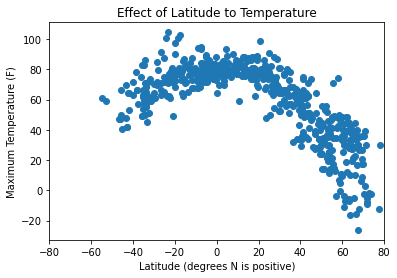

In [14]:
plt.scatter(weather_df['Latitude'],weather_df['Max_Temp'])
plt.title("Effect of Latitude to Temperature")
plt.xlabel("Latitude (degrees N is positive)")
plt.ylabel("Maximum Temperature (F)")
plt.xlim(-80,80)
plt.show
plt.savefig('output_data/max_temp.png')

#### Latitude vs. Humidity Plot

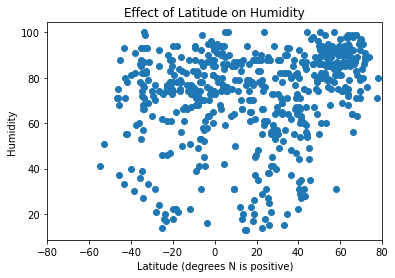

In [15]:
plt.scatter(weather_df['Latitude'],weather_df['Humidity'])
plt.title("Effect of Latitude on Humidity")
plt.xlabel("Latitude (degrees N is positive)")
plt.ylabel('Humidity')
plt.xlim(-80,80)
plt.show
plt.savefig('output_data/humidity.png')

#### Latitude vs. Cloudiness Plot

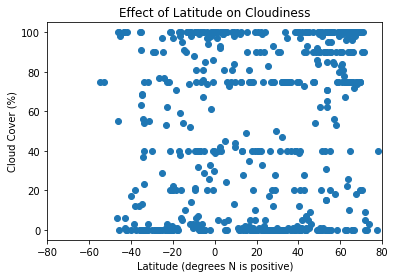

In [16]:
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'])
plt.title("Effect of Latitude on Cloudiness")
plt.xlabel("Latitude (degrees N is positive)")
plt.ylabel("Cloud Cover (%)")
plt.xlim(-80,80)
plt.show
plt.savefig('output_data/cloudiness.png')

#### Latitude vs. Wind Speed Plot

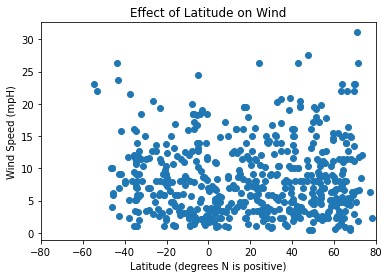

In [17]:
plt.scatter(weather_df['Latitude'],weather_df['Wind_Speed'])
plt.title("Effect of Latitude on Wind")
plt.xlabel("Latitude (degrees N is positive)")
plt.ylabel("Wind Speed (mpH)")
plt.xlim(-80,80)
plt.show
plt.savefig('output_data/wind_speed.png')